# TP2 - Régression logistique : faillite d'une entreprise

Dataset (source : https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction)

Nous ne proposons ici qu'un extrait du dataset total :

* Y - Bankrupt?: Class label
* X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
* X11 - Operating Expense Rate: Operating Expenses/Net Sales
* X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
* X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
* X16 - Net Value Per Share (B): Book Value Per Share(B)
* X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
* X20 - Cash Flow Per Share
* X21 - Revenue Per Share (Yuan ¥): Sales Per Share
* X24 - Realized Sales Gross Profit Growth Rate
* X25 - Operating Profit Growth Rate: Operating Income Growth
* X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
* X29 - Total Asset Growth Rate: Total Asset Growth
* X30 - Net Value Growth Rate: Total Equity Growth
* X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
* X34 - Quick Ratio: Acid Test
* X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
* X36 - Total debt/Total net worth: Total Liability/Equity Ratio
* X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
* X40 - Borrowing dependency: Cost of Interest-bearing Debt
* X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
* X46 - Accounts Receivable Turnover
* X47 - Average Collection Days: Days Receivable Outstanding
* X48 - Inventory Turnover Rate (times)
* X49 - Fixed Assets Turnover Frequency
* X50 - Net Worth Turnover Rate (times): Equity Turnover
* X51 - Revenue per person: Sales Per Employee
* X53 - Allocation rate per person: Fixed Assets Per Employee
* X55 - Quick Assets/Total Assets
* X56 - Current Assets/Total Assets
* X57 - Cash/Total Assets
* X59 - Cash/Current Liability
* X60 - Current Liability to Assets
* X62 - Inventory/Working Capital
* X63 - Inventory/Current Liability
* X64 - Current Liabilities/Liability
* X65 - Working Capital/Equity
* X68 - Retained Earnings to Total Assets
* X70 - Total expense/Assets
* X71 - Current Asset Turnover Rate: Current Assets to Sales
* X72 - Quick Asset Turnover Rate: Quick Assets to Sales
* X74 - Cash Turnover Rate: Cash to Sales
* X75 - Cash Flow to Sales
* X76 - Fixed Assets to Assets
* X79 - Equity to Long-term Liability
* X83 - Cash Flow to Equity
* X87 - Total assets to GNP price

On cherche ici à appréhender comment travailler avec une régression logistique, puis comment mesurer les performances d'une classification.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("TP2 - Bankruptcy.csv")
df.head(15)

,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Net Value Per Share (B),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,...,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Equity to Long-term Liability,Cash Flow to Equity,Total assets to GNP price,Bankrupt?
0,0.302646,1.256969e-04,0.000000e+00,0.000725,0.147950,0.169141,0.311664,0.017560,0.022102,0.848195,...,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.671568,0.424206,0.126549,0.312905,0.009219,1
1,0.303556,2.897851e-04,0.000000e+00,0.000647,0.182251,0.208944,0.318137,0.021144,0.022080,0.848088,...,0.025516,1.065198e-04,7.700000e+09,2.490000e+09,0.671570,0.468828,0.120916,0.314163,0.008323,1
2,0.302035,2.361297e-04,2.550000e+07,0.000790,0.177911,0.180581,0.307102,0.005944,0.022760,0.848094,...,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.671571,0.276179,0.117922,0.314515,0.040003,1
3,0.303350,1.078888e-04,0.000000e+00,0.000449,0.154187,0.193722,0.321674,0.014368,0.022046,0.848005,...,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.671519,0.559144,0.120760,0.302382,0.003252,1
4,0.303475,7.890000e+09,0.000000e+00,0.000686,0.167502,0.212537,0.319162,0.029690,0.022096,0.848258,...,0.026385,6.680000e+09,5.050000e+09,8.240000e+08,0.671563,0.309555,0.110933,0.311567,0.003878,1
5,0.303116,1.571500e-04,0.000000e+00,0.000716,0.155577,0.174435,0.325387,0.018104,0.021565,0.847983,...,0.040094,8.010000e+09,2.810000e+09,2.950000e+08,0.671568,0.603193,0.112917,0.313268,0.005278,1
6,0.302814,3.984834e-04,7.300000e+08,0.000805,0.158822,0.161482,0.316687,0.030915,0.022112,0.848322,...,0.092802,1.058011e-04,9.560000e+09,2.390000e+09,0.671562,0.355854,0.120561,0.310296,0.018372,0
7,0.303545,9.000000e+09,5.090000e+07,0.000630,0.176984,0.225206,0.324114,0.042561,0.022114,0.848082,...,0.025482,7.290000e+09,6.180000e+09,7.340000e+08,0.671572,0.218473,0.114508,0.314364,0.010005,0
8,0.303584,1.687136e-04,0.000000e+00,0.000737,0.184189,0.218398,0.318773,0.026604,0.022128,0.848159,...,0.029884,1.026722e-04,9.840000e+09,1.052297e-04,0.671576,0.323861,0.110933,0.315376,0.000824,0
9,0.303483,5.820000e+09,0.000000e+00,0.000672,0.177447,0.217831,0.330162,0.078664,0.022118,0.848084,...,0.035891,5.110000e+09,3.600000e+09,2.580000e+08,0.671572,0.254953,0.115499,0.314645,0.005798,0


Puisque nous travaillons un problème de classification, nous devons savoir si nous sommes dans un cadre déséquilibré ou non.

In [30]:
proportion = np.mean(df["Bankrupt?"])
print("La proportition de la classe d'intérêt est", round(100 * proportion, 2), "%")

La proportition de la classe d'intérêt est 3.21 %


Nous sommes donc clairement dans un cadre déséquilibré. Nous verrons à quel moment il nous faudra prendre en compte cela.
Pour le moment, nous devons nous assurer d'avoir un dataset le plus propre possible pour pouvoir travailler. Commençons par visualiser chacune des colonnes.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")



def explore_column(df, column, alpha=0.8, figsize=(15, 8)):
    
    def plot_histogram():
        plt.hist(df[column])
        plt.xlabel(column.capitalize())
        plt.title("Distribution de la variable %s" % column)
    
    def plot_price(alpha=alpha):
        plt.scatter(x=df[column], y=df["Bankrupt?"], alpha=alpha)
        plt.xlabel(column.capitalize())
        plt.ylabel("Bankrupt?")
        plt.title("Bankrupt event in function of %s" % column)
    
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plot_histogram()
    plt.subplot(1, 2, 2)
    plot_price()
    
    plt.suptitle("Variable %s" % column)
    plt.show()

Nous traçons dans un premier graphique la distribution d'une colonne du dataset. Dans le second graphique nous traçons la distribution de cette même colonne face à la variable que l'on cherche à prédire.
Dans le cadre d'une classification, puisque la variable d'intérêt est discrète, nous aurons ici des points alignés sur deux droites $y=0$ et $y=1$.

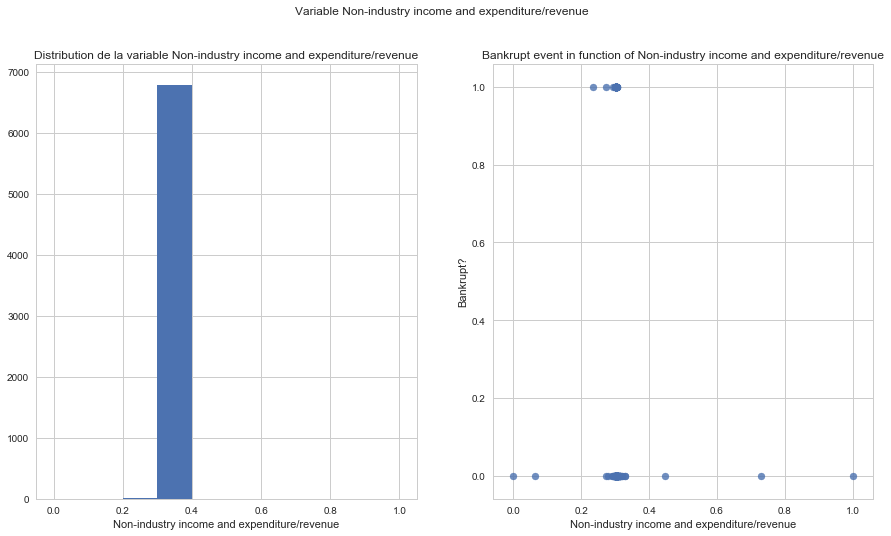

In [3]:
column = "Non-industry income and expenditure/revenue"
explore_column(df, column)

On voit que cette variable est très concentrée. Nous ne savons pas s'il s'agit de quelque chose qui est explicable au niveau métier, donc nous supprimerons l'ensemble des outliers que nous observons : ils ne sont pas dans la tendance de prédiction.

Nous répétons cette étape pour chacune des colonnes et finalement nous avons un ensemble de modification à faire.

In [4]:
print("Avant : %d" % df.shape[0])
df = df.loc[(df["Non-industry income and expenditure/revenue"] > 0.26) & (df["Non-industry income and expenditure/revenue"] < 0.4), ]
df = df.loc[(df["Net Value Per Share (B)"] < 0.6), ]
df = df.loc[(df["Cash Flow Per Share"] > 0.1) & (df["Cash Flow Per Share"] < 0.8), ]
df = df.loc[(df["Revenue Per Share (Yuan )"] < 0.3), ]
df = df.loc[(df["Realized Sales Gross Profit Growth Rate"] < 0.8), ]
df = df.loc[(df["Operating Profit Growth Rate"] > 0.2), ]
df = df.loc[(df["Continuous Net Profit Growth Rate"] < 0.8) & (df["Continuous Net Profit Growth Rate"] > 0) , ]
df = df.loc[(df["Net Value Growth Rate"] < 1e9) , ]
df = df.loc[(df["Quick Ratio"] < 0.8) , ]
df = df.loc[(df["Interest Expense Ratio"] > 0) , ]
df = df.loc[(df["Current Liability to Assets"] < 0.8) , ]
df = df.loc[(df["Inventory/Working Capital"] < 0.8) & (df["Inventory/Working Capital"] > 0) , ]
df = df.loc[(df["Retained Earnings to Total Assets"] > 0) , ]

print("Après : %d" % df.shape[0])

Avant : 6819
Après : 6763


Nous avons à présent une base de donnée plus *propre* pour pouvoir travailler la modélisation.

## Modélisation

Nous travaillerons avec une validation croisée pour estimer les performances de la régression logistique sur ce dataset.
Cependant, nous sommes dans un cadre déséquilibré : lorsque le découpage se fera, alors il est tout à fait possible qu'un pli de la validation croisé soit sans aucune observation négative ! Pour éviter cela, nous devons faire un échantillonnage stratifié pour pouvoir être certain qu'on aura toujours les mêmes proportions.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

def train_predict(model, X, y, name, metric=f1_score, cv=5):
    scores = cross_val_score(model, X, y, scoring=make_scorer(metric), cv=StratifiedKFold(n_splits=cv))
    mean_scores = np.mean(scores)
    std_scores = np.std(scores)
    print("%s : %0.2f (+/- %0.2f)" % (name, mean_scores, std_scores))
    return mean_scores, std_scores

Comme vu en cours, la descente de gradient (ou des variantes) sont utilisées pour pouvoir apprendre les paramètres d'une régression logistique. Ainsi, l'ordre de grandeur des variables aura un impact sur cette apprentissage.
Pour le contrer nous devons *standardiser* chacune des variables puis apprendre. 

L'étape de standardisation est souvent source d'erreur méthodologique. Nous avons un dataset d'entrainement $X_{\text{train}}$ et un dataset de test $X_{\text{test}}$. Nous allons standardiser $X_{\text{train}}$ en estimant pour chacune de ses colonnes sa moyenne et son écart type. Puis nous appliquerons exactement les **mêmes** valeurs au dataset de test : si nous le faisons sur $X$ directement alors nous utilisons des données du *futur* pour modifier le présent.

Une manière simple de ne pas faire cette erreur est d'utiliser une *Pipeline* que l'on définie et utilise de la manière suivante :

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



X = df.drop(columns=["Bankrupt?"], axis=1)
y = df["Bankrupt?"]



workflow = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="none", max_iter=10000))])
train_predict(workflow, X, y, "Baseline", metric=f1_score, cv=3)

workflow = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="l2", C=1, max_iter=10000))])
train_predict(workflow, X, y, "Ridge (C=1)", metric=f1_score, cv=3)

workflow = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="l2", C=30, max_iter=10000))])
train_predict(workflow, X, y, "Ridge (C=30)", metric=f1_score, cv=3)

Baseline : 0.28 (+/- 0.06)
Ridge (C=1) : 0.27 (+/- 0.05)
Ridge (C=30) : 0.28 (+/- 0.06)


(0.28334283000949667, 0.05543862500733191)

Nous venons d'avoir trois performances (f1-score) de régression logistique, une de base et deux avec une pénalisation des coefficients. Vérifions que nous avons bien testé des valeurs de pénalisations qui sont les meilleure :

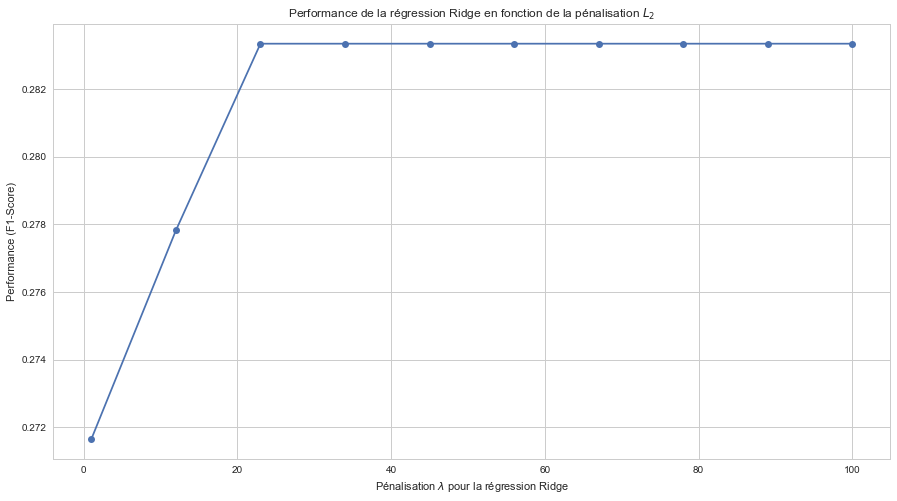

In [9]:
C_grid = np.linspace(1, 100, 10)
score_result = []
for C in C_grid:
    workflow = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(C=C, max_iter=10000))])
    scores = cross_val_score(workflow, X, y, scoring=make_scorer(f1_score), cv=StratifiedKFold(n_splits=3))
    score_result.append(np.mean(scores))

plt.figure(figsize=(15, 8))
plt.plot(C_grid, score_result, 'o-')
plt.xlabel(r"Pénalisation $\lambda$ pour la régression Ridge")
plt.ylabel("Performance (F1-Score)")
plt.title(r"Performance de la régression Ridge en fonction de la pénalisation $L_2$")
plt.show()

Malheureusement nous voyons bien ici que la performance n'est pas amélioré par l'ajout de cette contrainte.

La performance atteinte (0.28 de f1-score) est tout de même **faible**. Et surtout, nous avons vu en cours que la régression logistique prédit une probabilité d'appartenance, pas une classe. Comment est-il possible alors qu'une classe soit prédite ici ? 

Puisqu'une régression logistique renvoie une probabilité d'appartenance à la classe d'intérêt, il faut un seuil pour définir à partir de quelle valeur de probabilité on considère que l'on appartient ou non à la classe d'intérêt. Par défaut cette valeur est fixé à 0.5.

Mais est-elle la meilleure dans notre cas ?

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(penalty="none", max_iter=10000))])
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]



thresholds = [value * 0.1 for value in range(1, 10)]
metrics = [{"Name": "Précision", "Function": precision_score},
          {"Name": "Recall", "Function": recall_score},
          {"Name": "F1-score", "Function": f1_score}]


for threshold in thresholds:
    y_pred = np.array(y_pred_proba > threshold, dtype=int)
    print("Seuil %0.1f:" % threshold)
    for metric in metrics:
        print("\t%s: %0.2f" % (metric["Name"], metric["Function"](y_true=y_test, y_pred=y_pred)))

Seuil 0.1:
	Précision: 0.31
	Recall: 0.63
	F1-score: 0.42
Seuil 0.2:
	Précision: 0.39
	Recall: 0.43
	F1-score: 0.41
Seuil 0.3:
	Précision: 0.47
	Recall: 0.35
	F1-score: 0.40
Seuil 0.4:
	Précision: 0.50
	Recall: 0.28
	F1-score: 0.36
Seuil 0.5:
	Précision: 0.57
	Recall: 0.22
	F1-score: 0.32
Seuil 0.6:
	Précision: 0.64
	Recall: 0.17
	F1-score: 0.26
Seuil 0.7:
	Précision: 0.50
	Recall: 0.09
	F1-score: 0.16
Seuil 0.8:
	Précision: 0.50
	Recall: 0.07
	F1-score: 0.13
Seuil 0.9:
	Précision: 0.50
	Recall: 0.04
	F1-score: 0.07


Clairement, le seuil 0.5 par défaut n'est pas le meilleur dans notre cas ! Nous voyons que le seuil 0.1 ou le seuil 0.2 sont bien plus performant. Visualisons les performances selon le seuil :

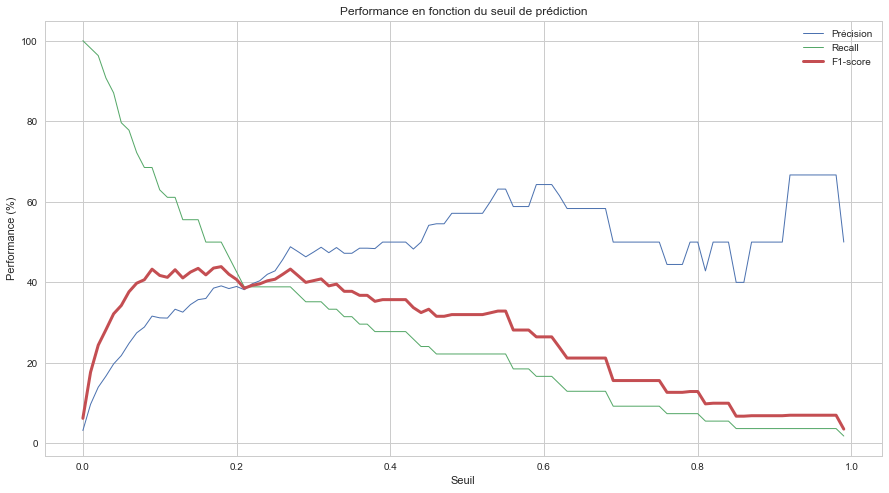

In [38]:
thresholds = np.linspace(0, 0.99, 100)

metrics = [{"Name": "Précision", "Function": precision_score},
          {"Name": "Recall", "Function": recall_score},
          {"Name": "F1-score", "Function": f1_score}]



precision = []
recall = []
f1 = []


for threshold in thresholds:
    y_pred = np.array(y_pred_proba > threshold, dtype=int)
    precision.append(precision_score(y_true=y_test, y_pred=y_pred))
    recall.append(recall_score(y_true=y_test, y_pred=y_pred))
    f1.append(f1_score(y_true=y_test, y_pred=y_pred))

    
    
plt.figure(figsize=(15, 8))

plt.plot(thresholds, np.array(precision) * 100, lw=1, label="Précision")
plt.plot(thresholds, np.array(recall) * 100, lw=1, label="Recall")
plt.plot(thresholds, np.array(f1) * 100, lw=3, label="F1-score")

plt.xlabel("Seuil")
plt.ylabel("Performance (%)")
plt.title("Performance en fonction du seuil de prédiction")
plt.legend()
plt.show()

Remarquons le rôle symétrique entre la précision et le recall et l'optimisation des deux par le f1-score ! Ce qui avait été décrit théoriquement dans le cours est maintenant bien visible.

En fonction de ce graphique nous sommes donc capable d'identifier le meilleur seuil pour le problème que l'on se pose, et ce n'est pas au data-scientist de choisir ce que l'on doit privilégié entre la précision et le recall.